# Figure S6: Model of intra-session modulations of run durations

## setup and imports

In [10]:
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import glob

from sessionlists import (dist60, dist90, dist120, TM20, TM10, TM2, TMrev2, TMrev10, TMrev20)
from utils import *
from plotting import *
from model_functions import *

plt.style.use('./Figures/paper.mplstyle')

In [11]:
# Define folder with data
root = "/home/thomas/Desktop/ALLDATA"

print("Path to data is: %s"%root)
print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/thomas/Desktop/ALLDATA
Found 34 rats in the data folder


In [12]:
rat_markers = {}
sequence = {}

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43', 
            'RatM53', 'RatM54']

m, f = 0, 0
male_palette = create_teal_palette(num_shades=len([x for x in animalList if 'M' in x]))
female_palette = create_blue_violet_palette(num_shades=len([x for x in animalList if 'F' in x]), start_intensity=80)

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[female_palette[f], 'o', '-']
        f += 1
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[male_palette[m], 'o', '-']
        m += 1
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p")

rat_markers['RatM00'] = ['dodgerblue', 'o', '-']

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43
Loading data for RatM53
Loading data for RatM54


# Figure S6A Distribution of the run durations 0-10min and u = 0
# Figure S6B Same as A for run durations 50-60min
# Figure S6C Same as A for run durations 0-10min and u = 1

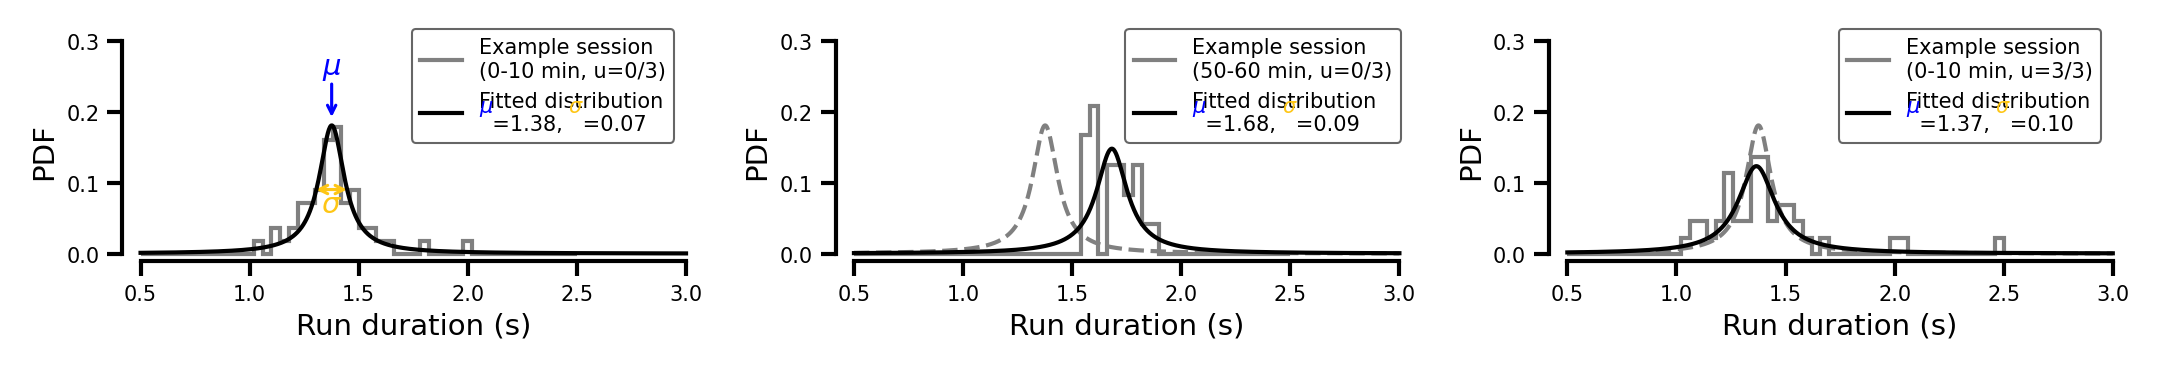

In [13]:

def FigureS6ABC(ax=None, timebin=0, historybin=0, plot_base=False):
    if ax is None: 
        fig, ax = plt.subplots(1, 1, figsize=(2, 2))

    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'

    runtimes = prepare_data_running_times(sequence, [animal], [session])
    runtimes = runtimes[animal][timebin][historybin]



    bins=np.linspace(0.5, 2.5, 2*25+1)
    ydata, xdata, _ = ax.hist(runtimes, bins=bins,
                    color='gray', zorder=4, lw=1,
                    # density=True,
                    weights=np.ones_like(runtimes) / len(runtimes),
                    histtype="step")

    ax.plot([-10, -11], [-10, -11], c='gray', lw=1, label=f"Example session\n({timebin*10}-{(timebin+1)*10} min, u={historybin}/3)")
    
    x = np.linspace(0.5, 3, 1000)
    p = stats.cauchy.fit(runtimes)
    y = stats.cauchy.pdf(x, *p) /25
    _ = r'$\mu$' 
    __ = r'$\sigma$'
    

    if plot_base:
        _p = (1.3762326452135996, 0.07045912526547222)
        yy = stats.cauchy.pdf(x, *_p) /25
        ax.plot(x, yy, color='gray', zorder=9, ls='--', lw=1)
        ax.plot(x, y, color='k', zorder=10, ls='-', lw=1, 
            label=f"Fitted distribution\n  ={p[0]:.2f},   ={p[1]:.2f}")

    if not plot_base:
        ax.plot(x, y, color='k', zorder=10, ls='-', lw=1, 
            label=f"Fitted distribution\n  ={p[0]:.2f},   ={p[1]:.2f}")
        x_peak = x[np.argmax(y)]
        y_peak = y[np.argmax(y)]

        # mu arrow
        ax.annotate(text='', xy=(x_peak, y_peak), xytext=(x_peak, y_peak+.07), fontsize=5, zorder=5, 
                    arrowprops=dict(arrowstyle='->', lw=0.75, color=plt.get_cmap('winter')(0)))
        ax.annotate(text=r'$\mu$', xy=(x_peak, y_peak), xytext=(x_peak, y_peak+.08), ha='center', va='center',
                    xycoords='data', fontsize=7, zorder=5, color=plt.get_cmap('winter')(0))
        
        half_max = np.max(y)/2
        idx = np.argwhere(np.diff(np.sign(y - half_max))).flatten()
        ax.annotate(text='', xy=(x[idx[0]], half_max), xytext=(x[idx[-1]], half_max), fontsize=5, zorder=5,
                    arrowprops=dict(arrowstyle='<->', lw=0.75, shrinkA=0, shrinkB=0, color='xkcd:golden yellow'))
        ax.annotate(text=r'$\sigma$', xy=(x_peak, y_peak/2-.02), xytext=(x_peak, y_peak/2-.02), ha='center', va='center',
                    xycoords='data', fontsize=7, zorder=5, color='xkcd:golden yellow')


    ax.set_xlim(.5, 3)
    ax.set_xticks([.5, 1, 1.5, 2, 2.5, 3])
    ax.set_ylim(0, .3)
    ax.set_yticks([0, .1, .2, .3])
    ax.set_xlabel('Run duration (s)')
    ax.set_ylabel('PDF')
    space_axes(ax)

    ax.text(2.05, 0.2, r'$\mu$', fontsize=5, color=plt.get_cmap('winter')(0), zorder=10)
    ax.text(2.46, 0.2, r'$\sigma$', fontsize=5, color='xkcd:golden yellow', zorder=10)
    
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.48, 1.1), 
        frameon=True, fontsize=5, handlelength=2,
        edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)
    

fig, axs = plt.subplots(1, 3, figsize=(cm2inch(18), cm2inch(2.84)),)
FigureS6ABC(axs[0], timebin=0, historybin=0)
FigureS6ABC(axs[1], timebin=5, historybin=0, plot_base=True)
FigureS6ABC(axs[2], timebin=0, historybin=3, plot_base=True)

# Figure S6D  Explanation $μ(t, u)$ and $σ(t, u)$ and $μ_0$, $μ_t$, $μ_u$, $σ_0$, $σ_t$ and $σ_u$ parameters

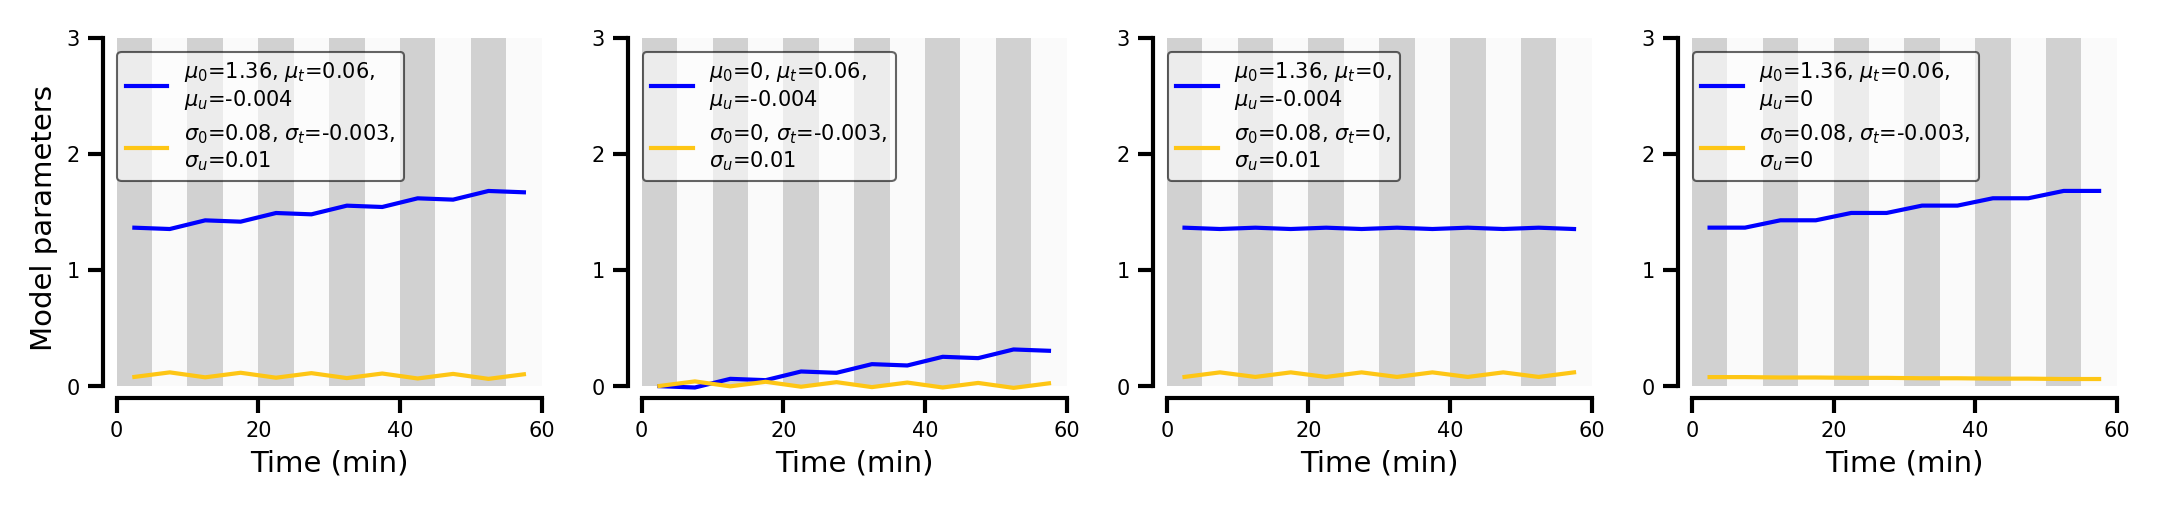

In [ ]:
def FigureS6D_0_params(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    MU = np.zeros((N_bins, N_avg))
    SIGMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            MU[bin, avg] = 0 + bin*ex_mu_t + avg*ex_mu_u
            SIGMA[bin, avg] = 0 + bin*ex_sigma_t + avg*ex_sigma_u

    a = []
    g = []

    _a, _a0, _at, _au = r'$\mu$', r'$\mu_0$', r"$\mu_t$", r"$\mu_u$"
    _g, _g0, _gt, _gu = r'$\sigma$', r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_u$"
    for i in range(6):
        a.append(.9*MU[i][0]+0.1*MU[i][1])
        a.append(.9*MU[i][-1]+0.1*MU[i][-2])
        g.append(.9*SIGMA[i][0]+0.1*SIGMA[i][1])
        g.append(.9*SIGMA[i][-1]+0.1*SIGMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('winter')(0), 
            label=f'{_a0}={0:.0f}, {_at}={ex_mu_t:.2f},\n{_au}={ex_mu_u:.3f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color='xkcd:golden yellow', 
            label=f'{_g0}={0:.0f}, {_gt}={ex_sigma_t:.3f},\n{_gu}={ex_sigma_u:.2f}')
    
    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')
    
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99),
                            frameon=True, fontsize=5, markerscale=1, #handlelength=1.5,
                            edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)

def FigureF6D_t_params(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    MU = np.zeros((N_bins, N_avg))
    SIGMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            MU[bin, avg] = ex_mu + bin*0 + avg*ex_mu_u
            SIGMA[bin, avg] = ex_sigma + bin*0 + avg*ex_sigma_u

    a = []
    g = []

    _a, _a0, _at, _au = r'$\mu$', r'$\mu_0$', r"$\mu_t$", r"$\mu_u$"
    _g, _g0, _gt, _gu = r'$\sigma$', r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_u$"
    for i in range(6):
        a.append(.9*MU[i][0]+0.1*MU[i][1])
        a.append(.9*MU[i][-1]+0.1*MU[i][-2])
        g.append(.9*SIGMA[i][0]+0.1*SIGMA[i][1])
        g.append(.9*SIGMA[i][-1]+0.1*SIGMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('winter')(0), 
            label=f'{_a0}={ex_mu:.2f}, {_at}={0:.0f},\n{_au}={ex_mu_u:.3f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color='xkcd:golden yellow', 
            label=f'{_g0}={ex_sigma:.2f}, {_gt}={0:.0f},\n{_gu}={ex_sigma_u:.2f}')

    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')
    
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99),
                            frameon=True, fontsize=5, markerscale=1, #handlelength=1.5,
                            edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)

def FigureF6D_u_params(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    MU = np.zeros((N_bins, N_avg))
    SIGMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            MU[bin, avg] = ex_mu + bin*ex_mu_t + avg*0
            SIGMA[bin, avg] = ex_sigma + bin*ex_sigma_t + avg*0

    a = []
    g = []

    _a, _a0, _at, _au = r'$\mu$', r'$\mu_0$', r"$\mu_t$", r"$\mu_u$"
    _g, _g0, _gt, _gu = r'$\sigma$', r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_u$"
    for i in range(6):
        a.append(.9*MU[i][0]+0.1*MU[i][1])
        a.append(.9*MU[i][-1]+0.1*MU[i][-2])
        g.append(.9*SIGMA[i][0]+0.1*SIGMA[i][1])
        g.append(.9*SIGMA[i][-1]+0.1*SIGMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('winter')(0), 
            label=f'{_a0}={ex_mu:.2f}, {_at}={ex_mu_t:.2f},\n{_au}={0:.0f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color='xkcd:golden yellow', 
            label=f'{_g0}={ex_sigma:.2f}, {_gt}={ex_sigma_t:.3f},\n{_gu}={0:.0f}')
    
    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')
    
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99),
                            frameon=True, fontsize=5, markerscale=1, #handlelength=1.5,
                            edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)

def FigureS6D_all_params(ax=None, show_ylabel=False, show_xlabel=True):
    if ax is None:
        _, ax = plt.subplots(1, 1)

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)

    N_bins = 6
    N_avg = 4
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    MU = np.zeros((N_bins, N_avg))
    SIGMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            MU[bin, avg] = ex_mu + bin*ex_mu_t + avg*ex_mu_u
            SIGMA[bin, avg] = ex_sigma + bin*ex_sigma_t + avg*ex_sigma_u

    a = []
    g = []

    _a, _a0, _at, _au = r'$\mu$', r'$\mu_0$', r"$\mu_t$", r"$\mu_u$"
    _g, _g0, _gt, _gu = r'$\sigma$', r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_u$"
    for i in range(6):
        a.append(.9*MU[i][0]+0.1*MU[i][1])
        a.append(.9*MU[i][-1]+0.1*MU[i][-2])
        g.append(.9*SIGMA[i][0]+0.1*SIGMA[i][1])
        g.append(.9*SIGMA[i][-1]+0.1*SIGMA[i][-2])

    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [a[i] for i in range(0, len(blocks))], color=plt.get_cmap('winter')(0), 
            label=f'{_a0}={ex_mu:.2f}, {_at}={ex_mu_t:.2f},\n{_au}={ex_mu_u:.3f}')
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
            [g[i] for i in range(0, len(blocks))], color='xkcd:golden yellow', 
            label=f'{_g0}={ex_sigma:.2f}, {_gt}={ex_sigma_t:.3f},\n{_gu}={ex_sigma_u:.2f}')
    
    if show_xlabel:
        ax.set_xlabel("Time (min)")
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    space_axes(ax)
    if show_ylabel:
        ax.set_ylabel('Model parameters', color='k')

    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99),
                            frameon=True, fontsize=5, markerscale=1, #handlelength=1.5,
                            edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)


fig, ax = plt.subplots(1, 4, figsize=(cm2inch(18), cm2inch(4)))
FigureS6D_all_params(ax=ax[0], show_ylabel=True)
FigureS6D_0_params(ax=ax[1])
FigureF6D_t_params(ax=ax[2])
FigureF6D_u_params(ax=ax[3])



# Figure S6E Simulation from fitted $μ(t, u)$ values and experimental run duration

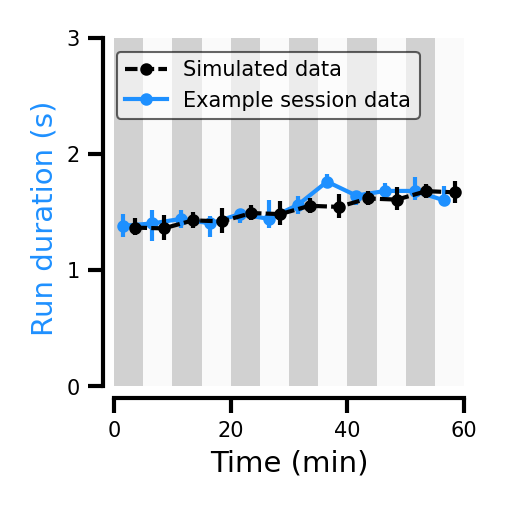

In [ ]:
def FigureS6E(root, ax=None, show_ylabel=False):
    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]
    
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, ymin=1/30, ymax=1, color='grey', alpha=rewardProbaBlock[i]/250, lw=0)
    
    ax.set_xlabel("Time (min)")
    if show_ylabel:
        ax.set_ylabel("Run duration (s)", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_xticks([0, 20, 40, 60])
    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1, 2, 3])
    space_axes(ax)


    # experimental rat data
    animal='RatM00'
    session='RatM00_2021_07_22_16_13_03'

    _params = get_from_pickle(root, animal, session, name="params.p")
    blocks = _params['blocks']
    rewardProbaBlock = _params['rewardProbaBlock']
    example_runningTimeInLeftBin, example_runningTimeInRightBin = get_from_pickle(root, animal, session, name="timeRun.p")
    data = [example_runningTimeInLeftBin[i]+example_runningTimeInRightBin[i] for i in range(0, 12)]

    data_medians = [np.median(data[i]) for i in range(12)]
    data_bot_percentiles = [np.percentile(data[i], 25) for i in range(12)]
    data_top_percentiles = [np.percentile(data[i], 75) for i in range(12)]
        
    ax.errorbar([-1+(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
                data_medians,
                yerr=[[data_medians[i]-data_bot_percentiles[i] for i in range(12)], [data_top_percentiles[i]-data_medians[i] for i in range(12)]],
                marker='o', ms=2, color='dodgerblue', 
                zorder=4, alpha=1, label='Example session data')


    # fit, generate samples from distribution with fit parameters, take median
    N_bins = 6
    N_avg = 4
    ex_mu, ex_mu_t, ex_mu_u, ex_sigma, ex_sigma_t, ex_sigma_u = pickle.load(open("picklejar/example_session_fit_run_duration.p", "rb"))
    MU = np.zeros((N_bins, N_avg))
    SIGMA = np.zeros((N_bins, N_avg))

    for bin in range(N_bins):
        for avg in range(N_avg):
            MU[bin, avg] = ex_mu + bin*ex_mu_t + avg*ex_mu_u
            SIGMA[bin, avg] = ex_sigma + bin*ex_sigma_t + avg*ex_sigma_u

    m = []
    s = []
    for i in range(6):
        m.append((.9*MU[i][0] + 0.1*MU[i][1]))
        m.append((.9*MU[i][-1] + 0.1*MU[i][-2]))
        s.append((.9*SIGMA[i][0] + 0.1*SIGMA[i][1]))
        s.append((.9*SIGMA[i][-1] + 0.1*SIGMA[i][-2]))


    res = [generate_running_time(m[i], s[i], 1000) for i in range(12)]
    medians = [np.median(res[i]) for i in range(12)]
    bot_percentiles = [np.nanpercentile(res[i], 25) for i in range(12)]
    top_percentiles = [np.nanpercentile(res[i], 75) for i in range(12)]

    ax.errorbar([1+(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))],
                medians,
                yerr=[[medians[i]-bot_percentiles[i] for i in range(12)], [top_percentiles[i]-medians[i] for i in range(12)]],
                color='k', marker='o', ms=2, ls=(0, (3, 1)), zorder=5)

    ax.plot([-100, -101], [-100, -101], color='k', marker='o', ms=2, ls=(0, (3, 1)), label='Simulated data', zorder=5)
    ax.plot([-100, -101], [-100, -101], marker='o', ms=2, color='dodgerblue', zorder=4, alpha=1, label='Example session data')
   
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(0.01, 0.99), frameon=True, fontsize=5, markerscale=1, edgecolor='k', facecolor='w').get_frame().set_linewidth(.5)

fig, ax = plt.subplots(1, 1, figsize=(cm2inch(4), cm2inch(4)))
FigureS6E(root=root, ax=ax, show_ylabel=True)


# Figure S6: Model of intra-session modulations of run durations.

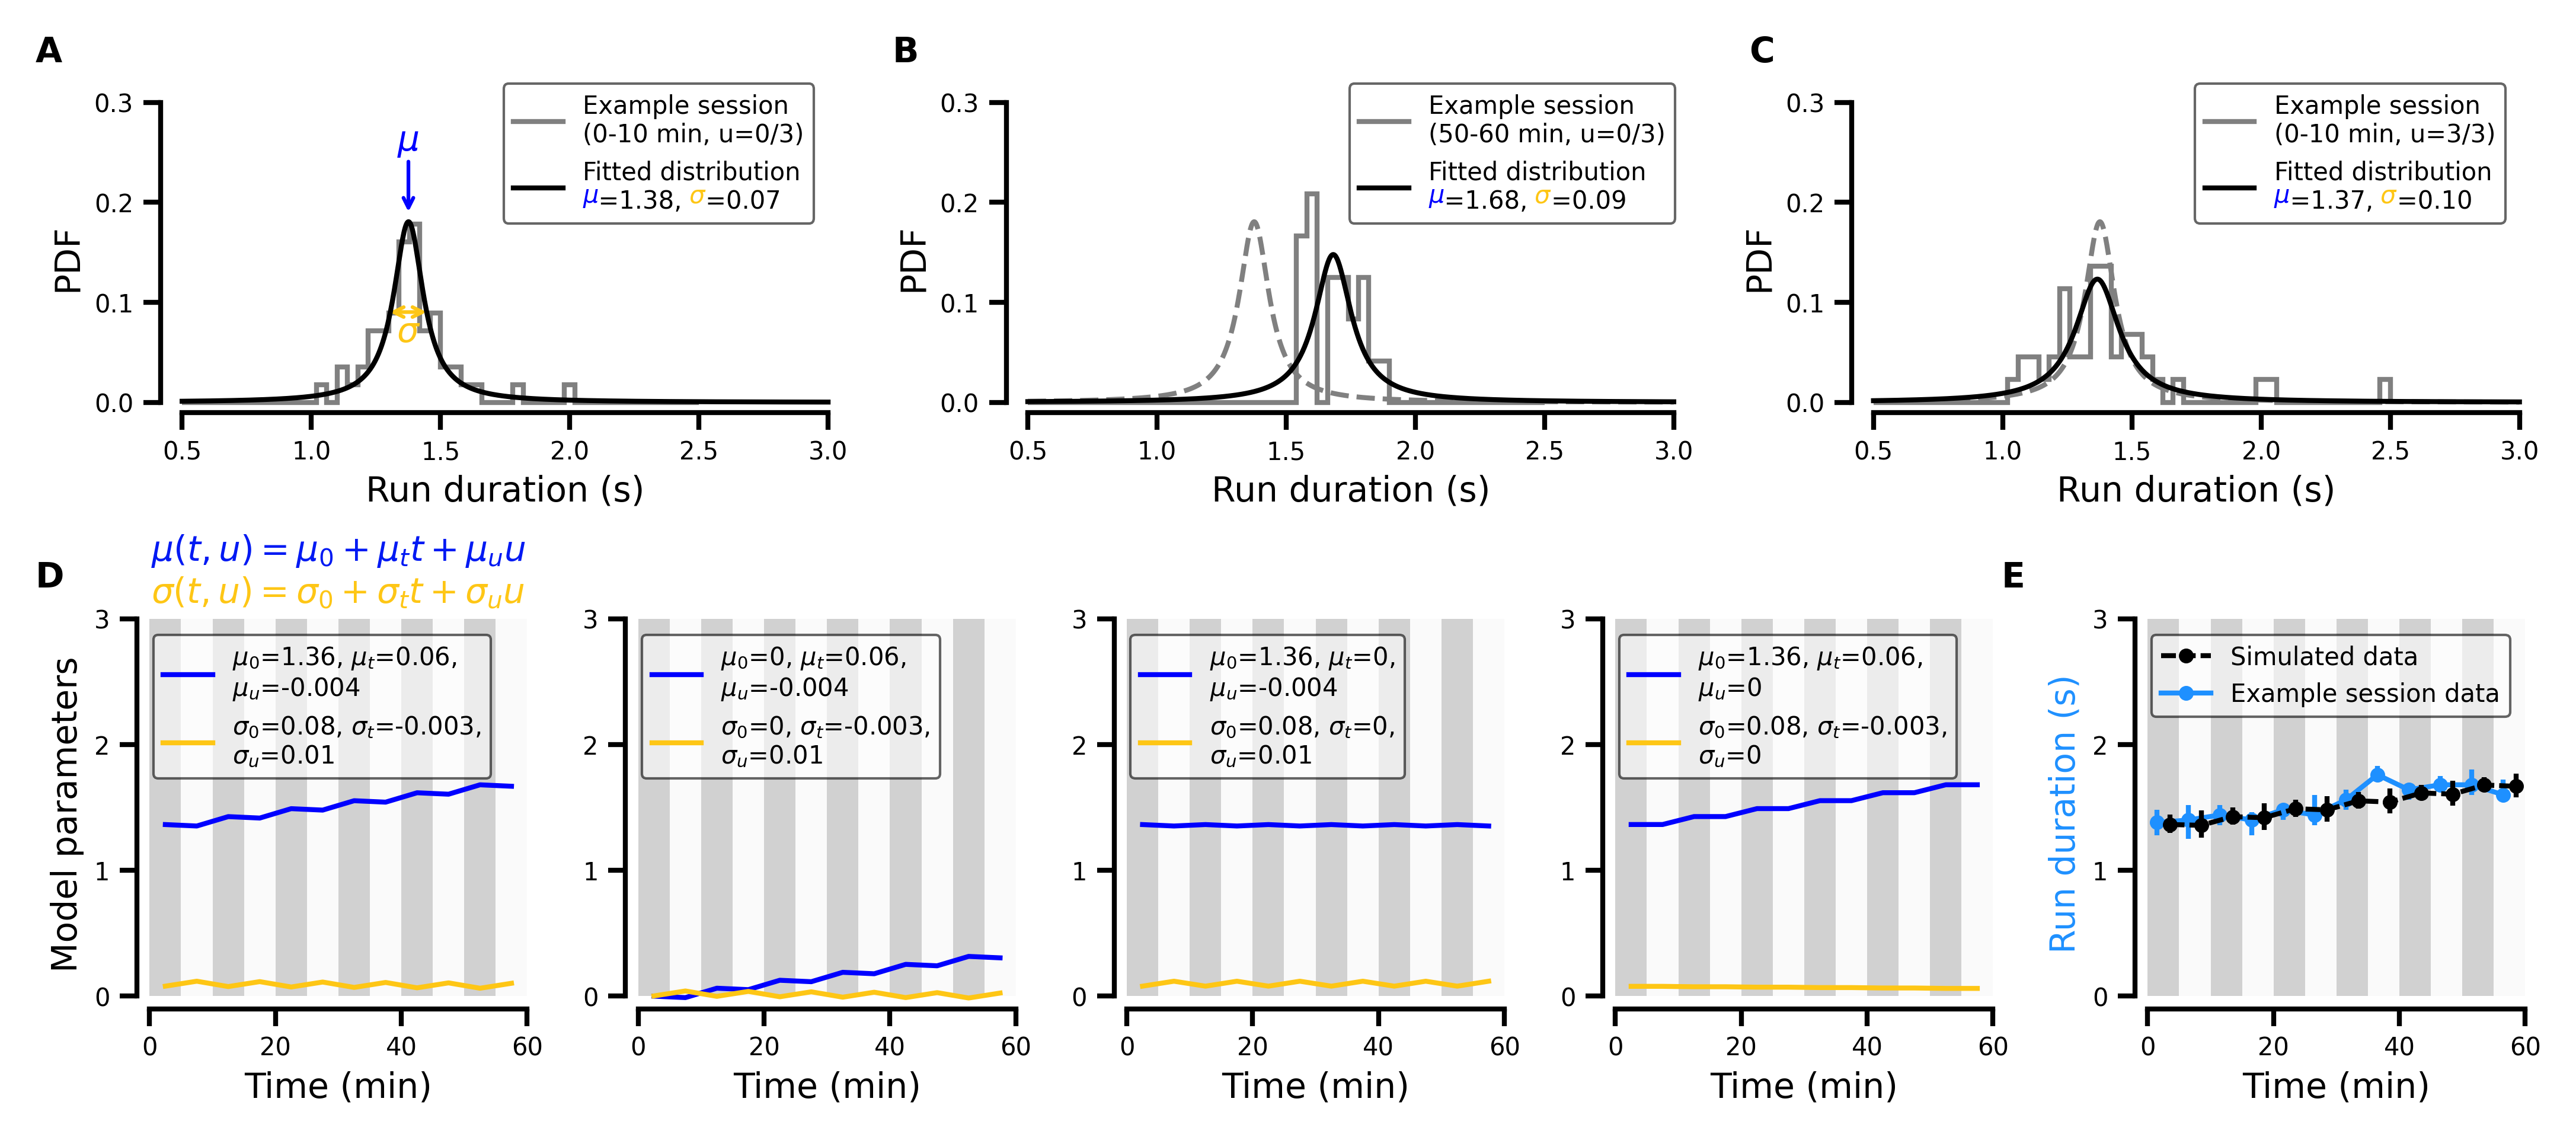

In [16]:
fig = plt.figure(figsize=(cm2inch(18), cm2inch(7.5)), 
                 constrained_layout=True, facecolor='w', dpi=600)


gs = fig.add_gridspec(2, 1, height_ratios=[1, 1])

gs0 = gs[0].subgridspec(2, 3, height_ratios=[1, .1])
fit_base = plt.subplot(gs0[0, 0])
fit_alpha = plt.subplot(gs0[0, 1])
fit_gamma = plt.subplot(gs0[0, 2])

gs1 = gs[1].subgridspec(1, 5, width_ratios=[1, 1, 1, 1, 1])
explanation_0tu = plt.subplot(gs1[0])
explanation_0 = plt.subplot(gs1[1])
explanation_t = plt.subplot(gs1[2])
explanation_u = plt.subplot(gs1[3])
model_0tu = plt.subplot(gs1[4])


FigureS6ABC(fit_base, timebin=0, historybin=0)
FigureS6ABC(fit_alpha, timebin=5, historybin=0, plot_base=True)
FigureS6ABC(fit_gamma, timebin=0, historybin=3, plot_base=True)

FigureS6D_all_params(ax=explanation_0tu, show_ylabel=True)
FigureS6D_0_params(ax=explanation_0)
FigureF6D_t_params(ax=explanation_t)
FigureF6D_u_params(ax=explanation_u)

FigureS6E(root=root, ax=model_0tu, show_ylabel=True)

equ_mu =r'$\mu(t, u) = \mu_0 + \mu_t t + \mu_u u$'
equ_sigma =r'$\sigma(t, u) = \sigma_0 + \sigma_t t + \sigma_u u$'

fig.canvas.draw()
fig_axes = fig.axes
bounds = [_ax.get_position().bounds for _ax in fig_axes]

x = bounds[3][0] + bounds[3][2]/2
y = bounds[3][1] + bounds[3][3] + 0.025
fig.text(x, y+0.04, equ_mu, ha='center', va='center', fontsize=7, figure=fig, color=plt.get_cmap('winter')(0.1))
fig.text(x, y, equ_sigma, ha='center', va='center', fontsize=7, figure=fig, color='xkcd:golden yellow')


figuresLabels={"A":[0.0, 1.0], "B":[0.34, 1], "C":[0.68, 1],  
               "D":[0.0, .5], "E":[0.78, .5]}
for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1], label, figure=fig, 
             weight='bold', fontsize=7, ha='left', va='bottom')

plt.savefig("./Figures_paper/Figure_S6.pdf", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="pdf", dpi=600)

plt.savefig("./Figures_paper/Figure_S6.svg", facecolor='w', 
        edgecolor='none', bbox_inches='tight', format="svg", dpi=600)
